<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [4]:
# Read CSV
data = pd.read_csv("../../DATA/Sacramento_transactions.csv")

In [5]:
data.shape

(985, 12)

In [6]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [8]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [10]:
data['zip'] = data['zip'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [11]:
data['sale_date'] = pd.to_datetime(data['sale_date'].str.replace('EDT', 'UTC+4'))

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768


In [31]:
data['day'] = data['sale_date'].dt.day

data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,day
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,21


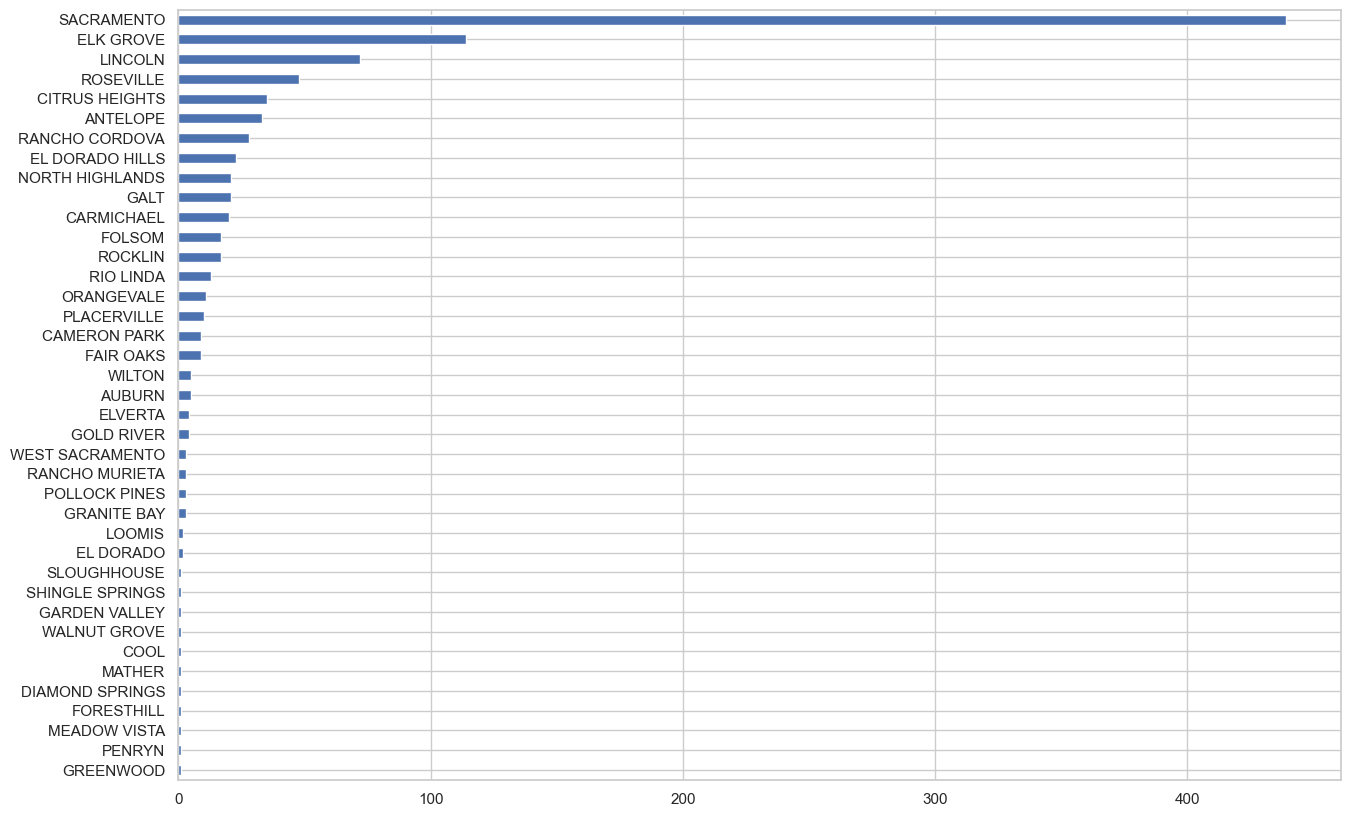

In [33]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [12]:
import folium
import pandas as pd

m = folium.Map(location=[38.575764, -121.478851],
                    zoom_start=10)
                    

for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
## Price is dependent varaible or target variable. Based on other independent variable we'll predict price.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [38]:
# ANSWER
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show();

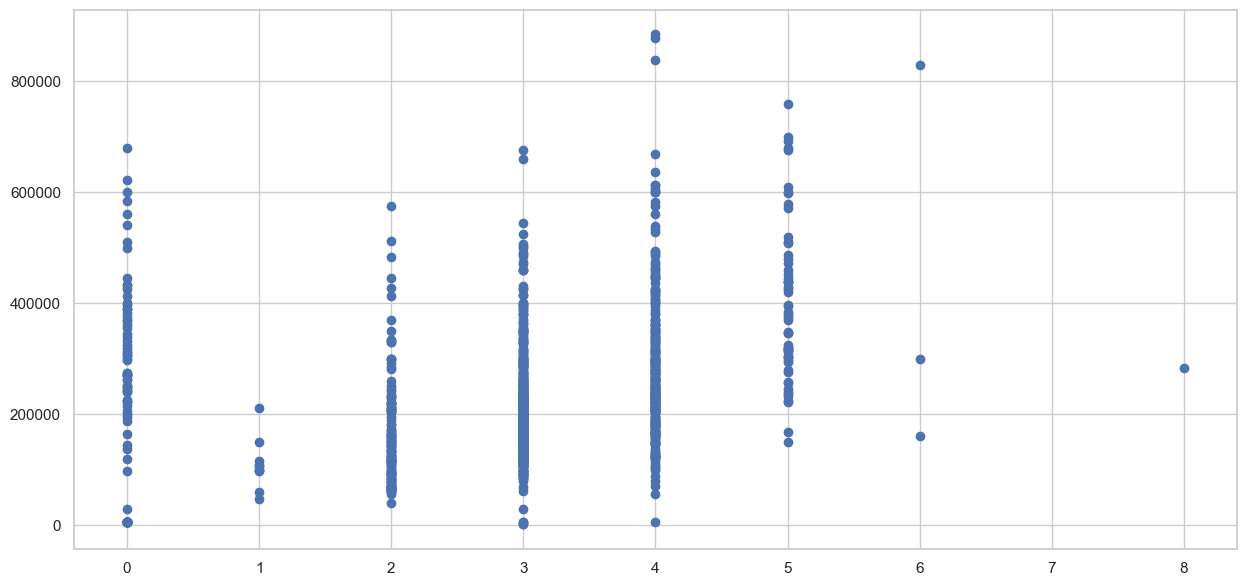

In [39]:
draw_scatter_plot(data['beds'], data['price'])

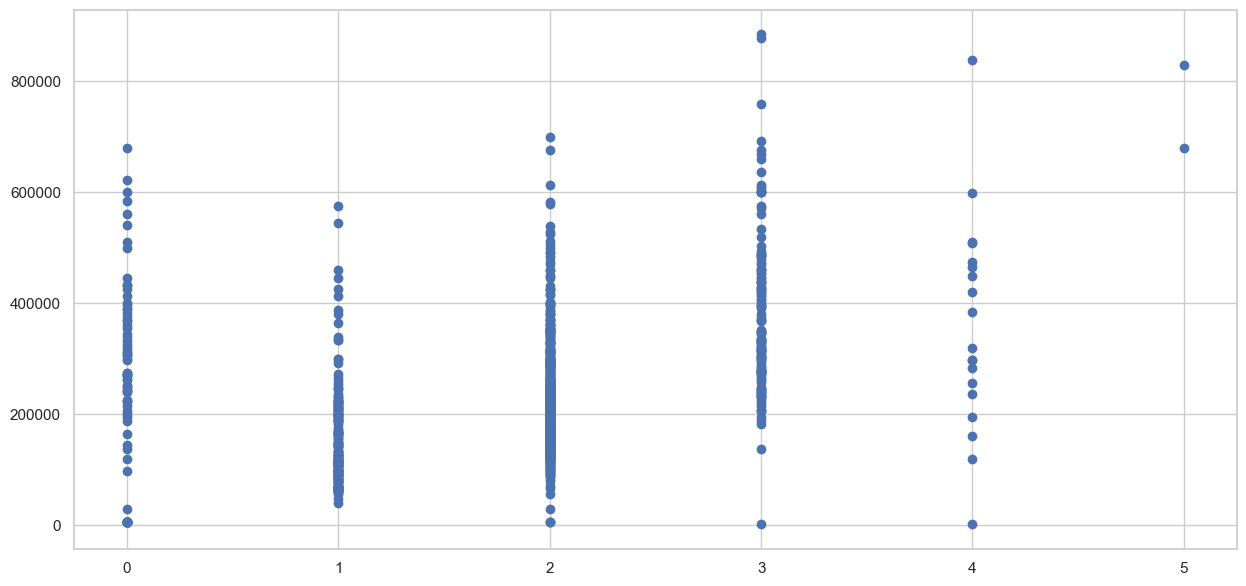

In [40]:
draw_scatter_plot(data['baths'], data['price'])

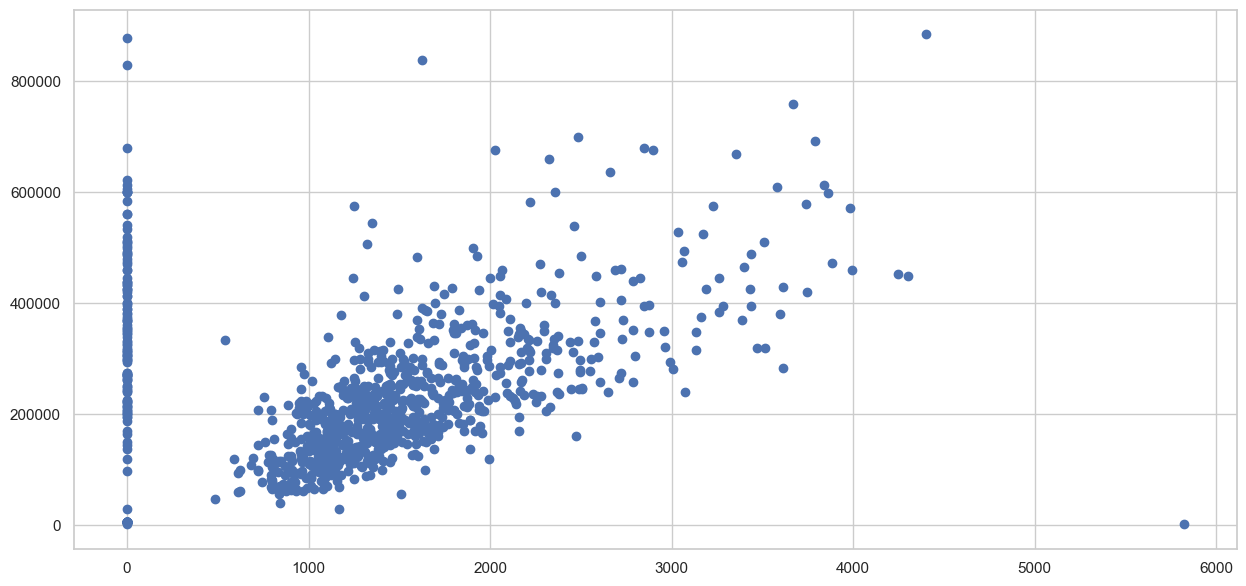

In [41]:
draw_scatter_plot(data['sq__ft'], data['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [42]:
# ANSWER
data.corr()

,beds,baths,sq__ft,price,latitude,longitude,day
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993,-0.003317
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582,0.027585
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742,0.052710
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485,0.050196
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925,-0.043809
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000,-0.004985
day,-0.003317,0.027585,0.052710,0.050196,-0.043809,-0.004985,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [43]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [44]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [45]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [46]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [47]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [48]:
# ANSWER
## Check training/test data
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 788

Sample of X_train__________________________________________________
[[1120]
 [   0]
 [1671]
 [1305]
 [1502]
 [1022]
 [ 795]
 [1067]
 [   0]
 [   0]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (788,)

Sample of y_train__________________________________________________
182    125000
133    370000
211    175000
92     250000
784    310000
14     108750
954    207973
163     80000
863    879000
707    215000
Name: price, dtype: int64


In [49]:
print('X_train is a %s' % type(X_test))
print('X_train has %d rows', X_test.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_train is a %s' % type(y_test))
print('y_train has %d rows', y_test.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_test[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows (197, 1)

Sample of X_train__________________________________________________
[[1231]
 [   0]
 [1465]
 [   0]
 [2334]
 [1174]
 [1555]
 [2212]
 [1443]
 [1478]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (197,)

Sample of y_train__________________________________________________
944    200000
249    242000
239    225000
588      4897
832    415000
364    116100
439    225500
791    315000
763    280000
80     231477
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [50]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[59.25580497] 155859.52854683704


In [51]:
# ANSWER
linreg.score(X_test, y_test)

0.003379791821466971

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [52]:
# ANSWER
linreg.intercept_, linreg.coef_

(155859.52854683704, array([59.25580497]))

In [53]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  227203.51773043931


In [54]:
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  227203.51773043931


#### Find the error

In [55]:
# Predict price from X_test
y_preds = linreg.predict(X_test)

y_preds[:10]

array([228803.42446462, 155859.52854684, 242669.28282755, 155859.52854684,
       294162.57734628, 225425.84358135, 248002.30527483, 286933.36913997,
       241365.65511821, 243439.60829216])

In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

18509642184.273415



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



